In [1]:
#!python -m venv sklearn-env
##!sklearn-env\Scripts\activate  # activate
#!pip install -U scikit-learn

The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /home/hoang/workSpace/personal/sp_ai/sklearn-env/bin/python

/bin/bash: line 1: sklearn-envScriptsactivate: command not found
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data.csv")
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
df['Classification'].value_counts()
df['Classification'] = df['Classification'] - 1

In [5]:
df['Classification'].value_counts()

Classification
1    64
0    52
Name: count, dtype: int64

In [6]:
y = df['Classification'].values.reshape(-1,1)
X = df.drop(columns=['Classification'])
print(X.shape)
print(y.shape)

(116, 9)
(116, 1)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.1)

In [8]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

my_tree = DecisionTreeClassifier(splitter='random')
my_tree.fit(X_train, y_train)

DecisionTreeClassifier(splitter='random')

In [9]:
y_pred = my_tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[7 2]
 [2 1]]


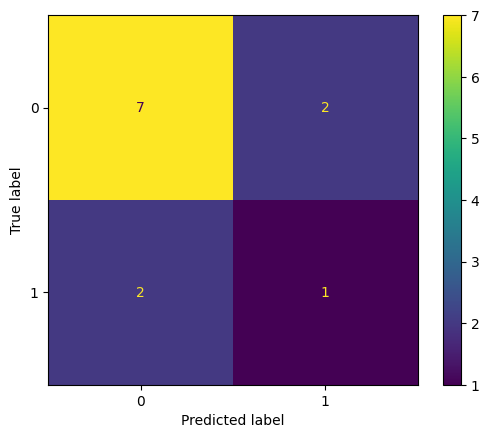

In [10]:
ConfusionMatrixDisplay.from_estimator(my_tree, X_test, y_test)

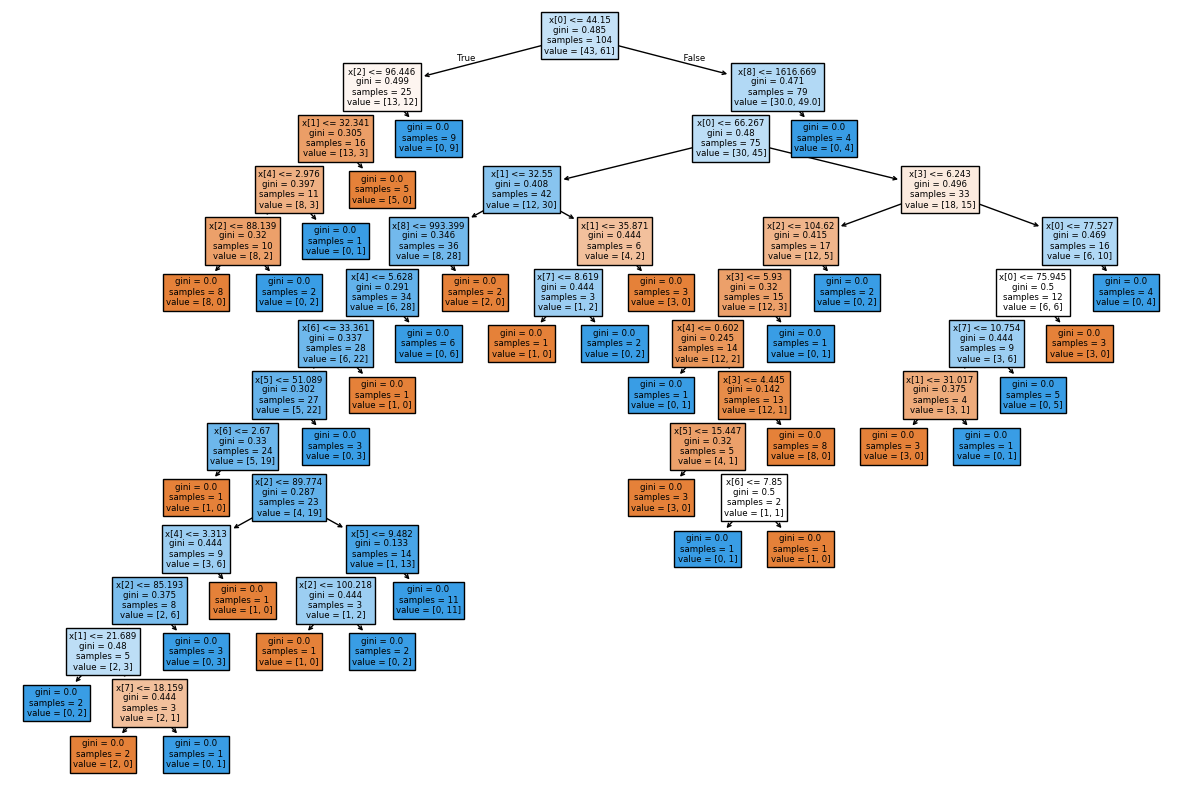

In [12]:
from sklearn import tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(my_tree, filled=True)